# Introduction to CNN and computer vision

## Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-05-21 17:57:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 2607:f8b0:4023:c06::80, 2607:f8b0:4023:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   156MB/s    in 0.7s    

2022-05-21 17:57:32 (156 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# walk through pizza_steak directory and list number of files
for dirparth, dirnames, filenames in os.walk("pizza_steak"):
  print("There are", len(dirnames), "directories and", len(filenames), "images in", dirparth)

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


## Visualize the data

In [8]:
# get the class names 

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of class_names from the subdirectories
print(class_names) 

['pizza' 'steak']


In [9]:
# visualize 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup the target directory
  target_folder = target_dir + target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print("Image shape: ", img.shape)

  return img

['2563233.jpg']
Image shape:  (512, 512, 3)


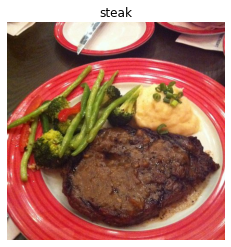

In [13]:
# view a random image from train

img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [14]:
img

array([[[155, 125, 114],
        [143, 113, 102],
        [132, 103,  89],
        ...,
        [139,  85,  85],
        [138,  84,  84],
        [131,  77,  77]],

       [[158, 128, 117],
        [162, 132, 121],
        [165, 136, 122],
        ...,
        [134,  80,  80],
        [127,  73,  73],
        [118,  64,  64]],

       [[174, 146, 132],
        [184, 156, 142],
        [189, 161, 147],
        ...,
        [123,  69,  69],
        [113,  59,  59],
        [102,  48,  48]],

       ...,

       [[226, 208, 188],
        [221, 203, 183],
        [220, 202, 182],
        ...,
        [211,  68,  51],
        [213,  68,  51],
        [204,  59,  42]],

       [[223, 205, 185],
        [228, 210, 190],
        [227, 209, 189],
        ...,
        [208,  63,  46],
        [208,  63,  46],
        [195,  48,  32]],

       [[226, 208, 188],
        [226, 208, 188],
        [220, 199, 178],
        ...,
        [205,  60,  41],
        [204,  57,  39],
        [188,  41,  23]]

In [15]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[155, 125, 114],
        [143, 113, 102],
        [132, 103,  89],
        ...,
        [139,  85,  85],
        [138,  84,  84],
        [131,  77,  77]],

       [[158, 128, 117],
        [162, 132, 121],
        [165, 136, 122],
        ...,
        [134,  80,  80],
        [127,  73,  73],
        [118,  64,  64]],

       [[174, 146, 132],
        [184, 156, 142],
        [189, 161, 147],
        ...,
        [123,  69,  69],
        [113,  59,  59],
        [102,  48,  48]],

       ...,

       [[226, 208, 188],
        [221, 203, 183],
        [220, 202, 182],
        ...,
        [211,  68,  51],
        [213,  68,  51],
        [204,  59,  42]],

       [[223, 205, 185],
        [228, 210, 190],
        [227, 209, 189],
        ...,
        [208,  63,  46],
        [208,  63,  46],
        [195,  48,  32]],

       [[226, 208, 188],
        [226, 208, 188],
        [220, 199, 178],
        ...,
        [205,  60,  4

In [16]:
# get all the pixel values between 0 and 1

img/225.

array([[[0.68888889, 0.55555556, 0.50666667],
        [0.63555556, 0.50222222, 0.45333333],
        [0.58666667, 0.45777778, 0.39555556],
        ...,
        [0.61777778, 0.37777778, 0.37777778],
        [0.61333333, 0.37333333, 0.37333333],
        [0.58222222, 0.34222222, 0.34222222]],

       [[0.70222222, 0.56888889, 0.52      ],
        [0.72      , 0.58666667, 0.53777778],
        [0.73333333, 0.60444444, 0.54222222],
        ...,
        [0.59555556, 0.35555556, 0.35555556],
        [0.56444444, 0.32444444, 0.32444444],
        [0.52444444, 0.28444444, 0.28444444]],

       [[0.77333333, 0.64888889, 0.58666667],
        [0.81777778, 0.69333333, 0.63111111],
        [0.84      , 0.71555556, 0.65333333],
        ...,
        [0.54666667, 0.30666667, 0.30666667],
        [0.50222222, 0.26222222, 0.26222222],
        [0.45333333, 0.21333333, 0.21333333]],

       ...,

       [[1.00444444, 0.92444444, 0.83555556],
        [0.98222222, 0.90222222, 0.81333333],
        [0.97777778, 0

## End-to-end example

* Load our images
* Preprocess our images
* Build aa CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# seed
tf.random.set_seed(42)

# preprocess data (pixel values between 0 and 1, also called scalling / normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# path to data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed = 42)
valid_data = valid_datagen.flow_from_directory(test_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed = 42)

# same as the tiny VGG model

model_1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (224,224,3)),
                                     tf.keras.layers.Conv2D(10, 3, activation = "relu"),
                                     tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
                                     tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                     tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile

model_1.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 99s 2s/step - loss: 0.5724 - accuracy: 0.7013 - val_loss: 0.4172 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 98s 2s/step - loss: 0.4388 - accuracy: 0.8020 - val_loss: 0.3759 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 97s 2s/step - loss: 0.4282 - accuracy: 0.8100 - val_loss: 0.3346 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 97s 2s/step - loss: 0.3673 - accuracy: 0.8413 - val_loss: 0.3336 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 98s 2s/step - loss: 0.3327 - accuracy: 0.8573 - val_loss: 0.3141 - val_accuracy: 0.8500


In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before 

The one we built for dots data set

In [19]:
# seed
tf.random.set_seed(42)

# create 

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
                                                       
])

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 247ms/step - loss: 1.0080 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 229ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


## Improving the above model

In [21]:
# seed
tf.random.set_seed(42)

# build
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit
history_3 =  model_3.fit(train_data,
                         epochs = 5,
                         steps_per_epoch = len(train_data),
                         validation_data = valid_data,
                         validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 305ms/step - loss: 3.2096 - accuracy: 0.6220 - val_loss: 3.1163 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 16s 345ms/step - loss: 1.3691 - accuracy: 0.6800 - val_loss: 0.5301 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 14s 295ms/step - loss: 0.5985 - accuracy: 0.7387 - val_loss: 0.5888 - val_accuracy: 0.7120
Epoch 4/5
47/47 [==============================] - 14s 292ms/step - loss: 0.5433 - accuracy: 0.7533 - val_loss: 0.4600 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 14s 300ms/step - loss: 0.6524 - accuracy: 0.7453 - val_loss: 0.5386 - val_accuracy: 0.7620


In [22]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________
